In [132]:
import pandas as pd
import numpy as np
movies = pd.read_csv("ml-latest-small/movies.csv")
movies_rating = pd.read_csv("ml-latest-small/ratings.csv")

# Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)
## Encontrar quantos filmes não possuem avaliações e quais são esses filmes

In [133]:
count_rating_by_movieId = movies_rating.pivot_table(index=['movieId'], aggfunc='size').rename('votes')
count_rating_by_movieId

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: votes, Length: 9724, dtype: int64

In [134]:
movies_with_votes = movies.join(count_rating_by_movieId, on="movieId")
movies_with_votes[movies_with_votes['votes'].isnull()]

,movieId,title,genres,votes
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
## Alterar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [135]:
rating = movies_rating.groupby("movieId")['rating'].mean()
rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [136]:
filmes_com_media = movies.join(rating, on="movieId").rename(columns={'rating': 'nota_média'})
filmes_com_media

,movieId,title,genres,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


# Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
## Adicionar ao filmes_com_media o total de votos de cada filme

In [137]:
movies_with_rating_and_votes = filmes_com_media.join(count_rating_by_movieId, on="movieId")
movies_with_rating_and_votes

,movieId,title,genres,nota_média,votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


# Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
## Arredondar as médias (coluna de nota média) para duas casas decimais.

In [138]:
movies_with_rating_and_votes = movies_with_rating_and_votes.round({'nota_média':2})
movies_with_rating_and_votes

,movieId,title,genres,nota_média,votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)
## Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [139]:
genres_split = movies.genres.str.split("|")
genres_split

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [141]:
genres = pd.DataFrame({'genre':np.concatenate(genres_split.values)})
list_genres = genres.groupby('genre').size().reset_index(name='count')
list_genres['genre']

0     (no genres listed)
1                 Action
2              Adventure
3              Animation
4               Children
5                 Comedy
6                  Crime
7            Documentary
8                  Drama
9                Fantasy
10             Film-Noir
11                Horror
12                  IMAX
13               Musical
14               Mystery
15               Romance
16                Sci-Fi
17              Thriller
18                   War
19               Western
Name: genre, dtype: object

# Desafio 6 da [Thais André](https://twitter.com/thais_tandre)
## Contar o número de aparições de cada genero.

In [144]:
list_genres

,genre,count
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


# Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
## Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

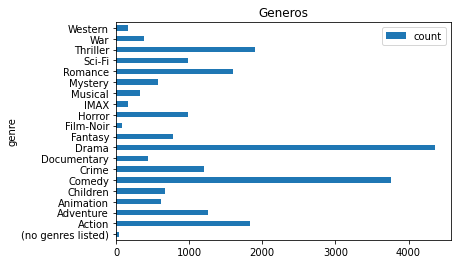

In [172]:
list_genres[['genre', 'count']].sort_values(by=['genre'], ascending=True).plot(x='genre', kind='barh', title="Generos")